In [1]:
import pandas as pd

In [4]:
df_train= pd.read_csv('train_aWnotuB.csv')
df_test= pd.read_csv('test_BdBKkAj_L87Nc3S.csv')
df_submission= pd.read_csv('sample_submission_KVKNmI7.csv') 

<h3>Having a look at the sample set of data</h3>

In [6]:
df_train.sample(5)

,DateTime,Junction,Vehicles,ID
30076,2015-12-08 04:00:00,3,5,20151208043
25392,2017-01-24 00:00:00,2,21,20170124002
45078,2017-02-24 06:00:00,4,6,20170224064
17086,2016-02-12 22:00:00,2,9,20160212222
39011,2016-12-14 11:00:00,3,14,20161214113


In [7]:
df_test.sample(5)

,DateTime,Junction,ID
9455,2017-07-25 23:00:00,4,20170725234
5260,2017-10-05 04:00:00,2,20171005042
10667,2017-09-14 11:00:00,4,20170914114
7574,2017-09-08 14:00:00,3,20170908143
1958,2017-09-20 14:00:00,1,20170920141


<h3>Having a look at the amount of missing data</h3>

In [10]:
df_train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [11]:
df_test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

<h3>Parsing Date</h3>

In [26]:
df_train['DateTime']= pd.to_datetime(df_train['DateTime'], format = "%Y-%m-%d %H:%M:%S")

<h3>Feature Engineering</h3>

In [68]:
df_train['Year']= df_train['DateTime'].dt.year
df_train['Month']= df_train['DateTime'].dt.month
df_train['Day']= df_train['DateTime'].dt.day
df_train['DayOfWeek']= df_train['DateTime'].dt.dayofweek

In [58]:
df_train.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Dat,Day,DayOfWeek
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,1,6
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,6
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,1,6
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,1,6
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,1,6


<h3>Visualizing Data</h3>

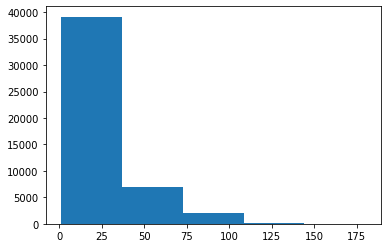

In [33]:
import matplotlib.pyplot as plt

vehicles = df_train.Vehicles

plt.hist(vehicles, bins=5)
plt.show()

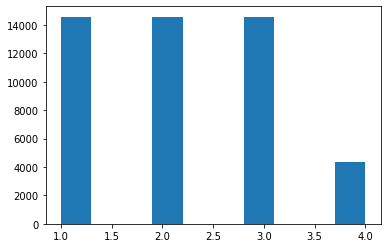

In [32]:
junction = df_train.Junction

plt.hist(junction)
plt.show()

In [30]:
df_train['Junction'].unique()

array([1, 2, 3, 4], dtype=int64)

In [69]:
dfJunction= df_train[['Junction', 'Vehicles']].groupby(['Junction']).sum().reset_index()
dfYear= df_train[['Year', 'Vehicles']].groupby(['Year']).sum().reset_index()
dfMonth= df_train[['Month', 'Vehicles']].groupby(['Month']).sum().reset_index()
dfDay= df_train[['Day', 'Vehicles']].groupby(['Day']).sum().reset_index()
dfDayofWeek= df_train[['DayOfWeek', 'Vehicles']].groupby(['DayOfWeek']).sum().reset_index()
dfMonthYear= df_train[['Year', 'Month', 'Vehicles']].groupby(['Year', 'Month']).sum().reset_index()

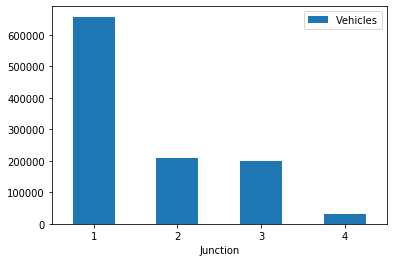

In [52]:
dfJunction.plot.bar(x='Junction', y='Vehicles', rot=0)

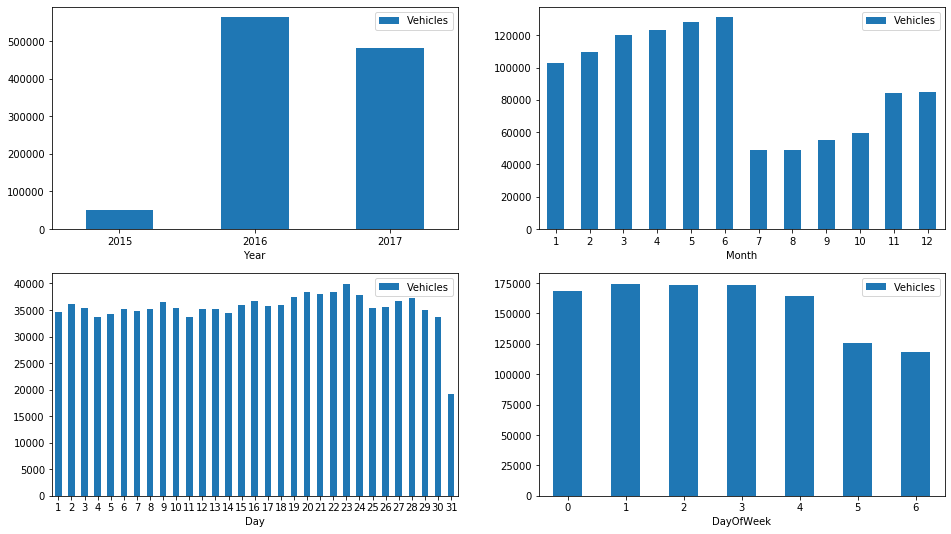

In [85]:
fig, axes = plt.subplots(figsize=(16,9),nrows=2, ncols=2)
dfYear.plot.bar(x='Year', y='Vehicles', rot=0, ax=axes[0,0])
dfMonth.plot.bar(x='Month', y='Vehicles', rot=0, ax=axes[0,1])
dfDay.plot.bar(x='Day', y='Vehicles', rot=0, ax=axes[1,0])
dfDayofWeek.plot.bar(x='DayOfWeek', y='Vehicles', rot=0, ax=axes[1,1])